# 0.) Import and Clean data

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [30]:
df = pd.read_csv("Country-data.csv", sep = ",")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [31]:
names = df[["country"]].copy()
X=df.drop(["country"],axis = 1)

In [32]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [33]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)

C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 2.) Pick two features to visualize across

In [34]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

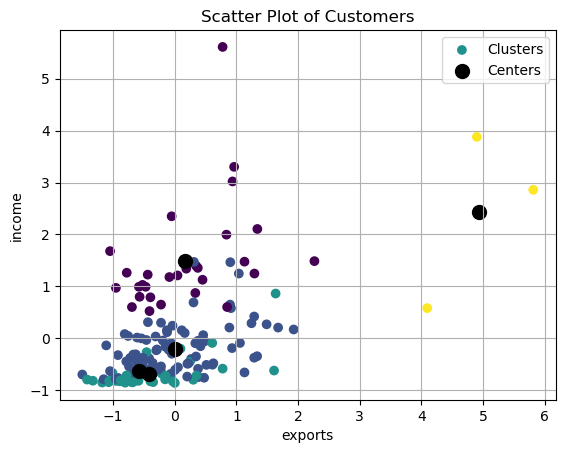

In [36]:
import matplotlib.pyplot as plt

x1_index = 1
x2_index = 4


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [37]:
WCSS = []
ks = range(1,15)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    WCSS.append(kmeans.inertia_)

C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [38]:
WCSS

[1502.9999999999998,
 1050.2145582853304,
 831.4244352086874,
 700.7033258497509,
 619.9371152246033,
 550.9802496891236,
 495.9177898235595,
 453.9555745697073,
 436.62142106339184,
 394.75685111000445,
 376.0286564673454,
 356.92825649372827,
 328.99076732300796,
 320.80759851252475]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

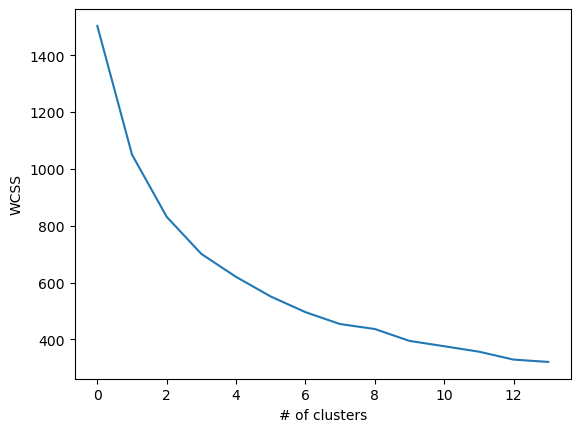

In [39]:
plt.plot(WCSS)
plt.xlabel("# of clusters")
plt.ylabel("WCSS")
plt.show()

I choose 6 clusters because I think it appropriately reflects the different income classes. In addition, the WCSS does not deteriorate that much anymore after 6 clusters.

# 6.) Do the same for a silhoutte plot

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
SS=[]
Ks = range(2,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = "random")
    kmeans.fit(X_scaled)
    labs = kmeans.labels_
    sil = silhouette_score(X_scaled,labs)
    SS.append(sil)

SS

C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\sit

[0.28735668921406704,
 0.28329575683463126,
 0.2975089381471821,
 0.2201207388855572,
 0.30408007785767016,
 0.24422433477827257,
 0.22621140169165757,
 0.20332927327172176,
 0.2133420750200729,
 0.184293042664226,
 0.20752098683051673,
 0.2228715547814295,
 0.19249826859619895]

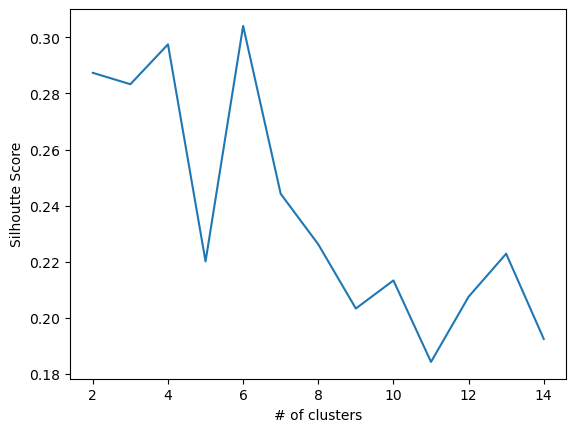

In [42]:
plt.plot(Ks, SS)
plt.ylabel("Silhoutte Score")
plt.xlabel("# of clusters")
plt.show()

Similarly, the silhouette score shows that 6 numbers of clusters is optimal.

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [43]:
kmeans = KMeans(n_clusters=6, n_init=30, init="random").fit(X_scaled)

C:\Users\Joshua Suero\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
preds = pd.DataFrame(kmeans.predict(X_scaled))
preds

,0
0,5
1,1
2,1
3,5
4,2
...,...
162,1
163,0
164,2
165,5


In [45]:
output = pd.concat([preds,df], axis = 1)
output.rename(columns = {0:"Clusters"},inplace=True)
output

,Clusters,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,5,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,5,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,1,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,2,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,5,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [24]:
#to print all countries in clusters 0
print("Clusters 0: ")
list(output.loc[output["Clusters"]==0, "country"])

Clusters 0: 


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [46]:
#to print all countries in clusters 1
print("Clusters 1: ")
list(output.loc[output["Clusters"]==1, "country"])

Clusters 1: 


['Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Bolivia',
 'Brazil',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Gabon',
 'Grenada',
 'Guatemala',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Kazakhstan',
 'Libya',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Peru',
 'Philippines',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Tonga',
 'Turkey',
 'Turkmenistan',
 'Uruguay',
 'Uzbekistan',
 'Vanuatu']

In [47]:
#to print all countries in clusters 2
print("Clusters 2: ")
list(output.loc[output["Clusters"]==2, "country"])

Clusters 2: 


['Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Cambodia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Estonia',
 'Fiji',
 'Georgia',
 'Guyana',
 'Hungary',
 'Jordan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Montenegro',
 'Panama',
 'Paraguay',
 'Poland',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Slovenia',
 'Solomon Islands',
 'South Korea',
 'Thailand',
 'Tunisia',
 'Ukraine',
 'Vietnam']

In [48]:
#to print all countries in clusters 3
print("Clusters 3: ")
list(output.loc[output["Clusters"]==3, "country"])

Clusters 3: 


['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [49]:
#to print all countries in clusters 4
print("Clusters 4: ")
list(output.loc[output["Clusters"]==4, "country"])

Clusters 4: 


['Luxembourg', 'Malta', 'Singapore']

In [50]:
#to print all countries in clusters 5
print("Clusters 5: ")
list(output.loc[output["Clusters"]==5, "country"])

Clusters 5: 


['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [ ]:
#### Write an observation

A general observation is that countries with the same economic income class are included in the same cluster.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [52]:
numeric_cols = output.select_dtypes(include=[np.number]).drop(columns = ["Clusters"])
numeric_cols.groupby(output["Clusters"]).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Clusters,,,,,,,,,
0,57.733333,33.500000,5.140000,30.566667,9786.666667,63.033333,67.366667,3.650000,6160.000000
1,27.715217,31.243239,5.354565,34.264476,12185.000000,9.241109,72.160870,2.581957,5878.608696
2,14.870455,53.202273,7.274545,62.465909,15105.681818,3.912795,73.954545,1.997955,9203.318182
3,5.100000,44.848148,9.361111,37.981481,46833.333333,2.891963,80.437037,1.838519,45322.222222
4,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
5,94.059091,28.357045,6.438182,43.609091,3455.522727,9.721023,58.890909,5.020455,1699.363636


In [53]:
numeric_cols.groupby(output["Clusters"]).std()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Clusters,,,,,,,,,
0,62.746341,11.542963,0.271846,22.632351,5953.153226,35.635984,7.518200,1.898499,6358.639792
1,15.355172,15.718693,1.725804,13.788768,9364.105403,5.968475,3.884870,0.723079,4444.981107
2,10.831148,16.373866,2.178100,14.143121,9082.327434,4.155031,4.347544,0.700616,7485.908485
3,2.227278,22.619314,3.357490,17.385605,20249.748337,4.440336,1.506179,0.361266,14475.266261
4,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084
5,32.641708,18.177728,2.692341,17.490540,5379.353508,7.362504,6.517055,1.057916,2838.105527


In [54]:
numeric_cols.groupby(output["Clusters"]).describe()


child_mort                                                      \
              count       mean        std   min     25%    50%      75%   
Clusters                                                                  
0               3.0  57.733333  62.746341  17.1  21.600  26.10   78.050   
1              46.0  27.715217  15.355172   8.7  16.800  21.10   35.150   
2              44.0  14.870455  10.831148   3.2   6.875  11.25   19.025   
3              27.0   5.100000   2.227278   2.6   3.900   4.30    5.400   
4               3.0   4.133333   2.309401   2.8   2.800   2.80    4.800   
5              44.0  94.059091  32.641708  52.5  66.075  90.25  111.000   

                exports              ... total_fer        gdpp                \
            max   count        mean  ...       75%   max count          mean   
Clusters                             ...                                       
0         130.0     3.0   33.500000  ...    4.2400  5.84   3.0   6160.000000   
1          64.4    46.0   31.243239  ...    2.8975  4.56  46.0   5878.608696   
2          44.4    44.0   53.202273  ...    2.2675  4.24  44.0   9203.318182   
3          10.8    27.0   44.848148  ...    2.0050  3.03  27.0  45322.222222   
4           6.8     3.0  176.000000  ...    1.4950  1.63   3.0  57566.666667   
5         208.0    44.0   28.357045  ...    5.5975  7.49  44.0   1699.363636   

                                                                       
                   std      min       25%      50%      75%       max  
Clusters                                                               
0          6358.639792   2330.0   2490.00   2650.0   8075.0   13500.0  
1          4444.981107    592.0   2865.00   4530.0   8282.5   19300.0  
2          7485.908485    786.0   3545.00   6970.0  12725.0   30800.0  
3         14475.266261  22500.0  35550.00  44400.0  49500.0   87800.0  
4         43011.665084  21100.0  33850.00  46600.0  75800.0  105000.0  
5          2838.105527    231.0    532.25    763.5   1310.0   17100.0  

[6 rows x 72 columns]

# 9.) Write an observation about the descriptive statistics.

Here are some observations based on the clusters:

Cluster 0:
Highest child mortality rate among the clusters.
Moderate to low levels of exports, health spending, income, life expectancy, and GDP per capita.
Relatively high inflation rate and total fertility rate.
Lower-middle-income group with moderate development indicators.

Cluster 1:
Moderate child mortality rate.
Moderate levels of exports, health spending, income, life expectancy, and GDP per capita.
Relatively low inflation rate and total fertility rate.
Middle-income group with moderate development indicators.

Cluster 2:
Low child mortality rate.
High levels of exports, health spending, income, life expectancy, and GDP per capita.
Low inflation rate and total fertility rate.
Higher-income group with relatively high development indicators.

Cluster 3:
Very low child mortality rate.
High exports, health spending, income, life expectancy, and GDP per capita.
Low inflation rate and total fertility rate.
High-income group with very high development indicators.

Cluster 4:
Very low child mortality rate.
Extremely high exports and income.
High health spending, life expectancy, and GDP per capita.
Very low inflation rate and total fertility rate.
High-income group with very high development indicators.

Cluster 5:
Highest child mortality rate among the clusters.
Low levels of exports, health spending, income, life expectancy, and GDP per capita.
Very high inflation rate and total fertility rate.
Low-income group with poor development indicators.